In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import scipy

#I try display latex symbols (not fundamental, but have a look)
from sympy import latex
from sympy import symbols
from IPython.display import display, Math

#plt.style.use("ggplot")

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


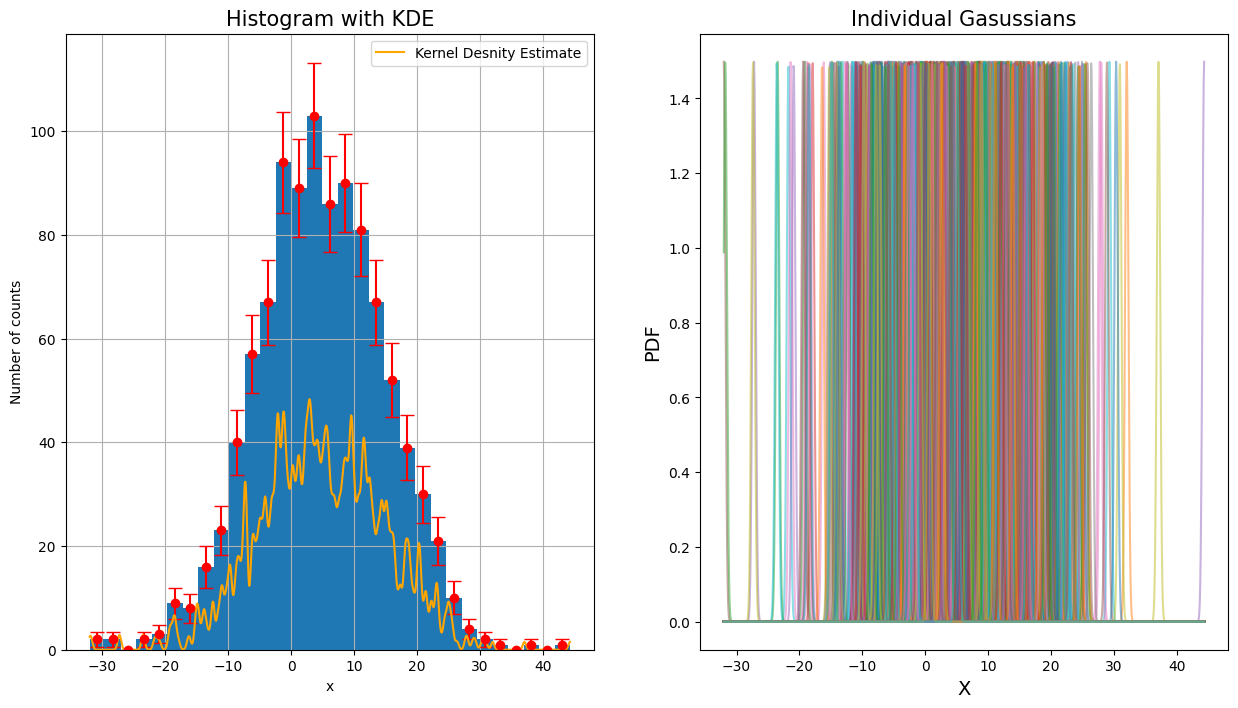

In [5]:
np.random.seed(19680801)
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import norm

N=1000
m=4
st=10
N_bins=int(np.sqrt(N)) #Rule of thumb for the number of bins
x=npr.normal(m,st,N)
ncounts,bins=np.histogram(x,bins=N_bins)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 8))
ax1.hist(x,bins=N_bins);
#plt.ylim(0,) #plot only positive values
ax1.set_xlabel("x")
ax1.set_ylabel("Number of counts")


#Poisson errors
err=np.sqrt(ncounts)
bin_centers=(bins[:-1]+bins[1:])/2
ax1.errorbar(bin_centers, ncounts, yerr=err, capsize=5, fmt='o', color='red')
ax1.set_title('Histogram with KDE',fontsize=15)
ax1.grid()

s=1

#KDE
gaussians=[]

for xi in x:
    gauss= norm.pdf(np.linspace(x.min(),x.max(),N),loc=xi,scale=1.06*s*N**(-1/5)) # loc is the gauss center
    gaussians.append(gauss)
    ax2.plot(np.linspace(x.min(),x.max(),N), gauss, alpha=0.5)  # Plot each Gaussian

ax2.set_xlabel('X',fontsize=14)
ax2.set_ylabel('PDF',fontsize=14)
ax2.set_title('Individual Gasussians',fontsize=15)

kde = np.sum(np.array(gaussians),axis=0) # the sum of gaussians is the KDE not normalised
integral = scipy.integrate.trapezoid(kde, np.linspace(x.min(),x.max(),N)) # Integral under the sum pf gaussians
kde_norm = kde/integral

ax1.plot(np.linspace(x.min(),x.max(),N), kde_norm*N, color='orange', label="Kernel Desnity Estimate")
ax1.legend(loc='best')


plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [6]:
def create_dat(N, m_x, st_x,m_y,st_y):
    
    """
    function to create the prescribed dataset:
    N: number of rows (elements) in the dataset
    each column has its own gaussian distribution
    m_x: mean of 1 var
    st_x: standard deviation of 1 var
    m_y:     2 var
    st_y:    2 var
    """
    xx=m_x+st_x*np.random.randn(N,2) #first column (category)
    zz=m_y+st_y*np.random.randn(N,2) #second column
    df = pd.DataFrame({
        "x": np.concatenate([xx[:, 0], zz[:, 0]]),
        "y": np.concatenate([xx[:, 1], zz[:, 1]]),
        "category": ["Category 1"] * N + ["Category 2"] * N  # Assign group labels
    })
    return df

Our dataset (head): 
           x         y    category
0  1.049304  0.866099  Category 1
1  0.551135  1.728078  Category 1
2 -0.649288 -0.478420  Category 1
3  1.077885  0.968810  Category 1
4 -0.809345 -1.237389  Category 1


Scatter plot: 



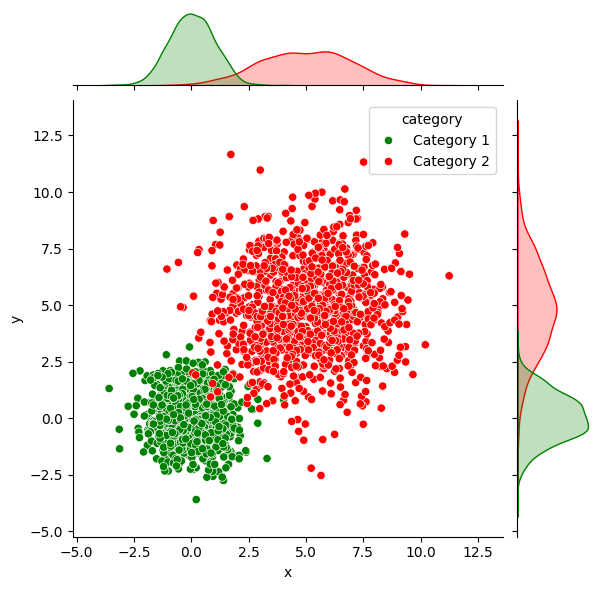

In [7]:
np.random.seed(19680801) #For reproducibility

#Setting parameters
N=1000
m_x=0
m_y=5
st_x=1
st_y=2

df=create_dat(N,m_x,st_x,m_y,st_y)

#creating a category variable

print("Our dataset (head): \n",df.head())
print("\n")

#Plotting
print("Scatter plot: \n")
#sns.relplot(x="x", y="y", data=df,hue="category",palette={"Category 1": "green", "Category 2": "red"}); #simple scatter plot
sns.jointplot(x="x", y="y", data=df,hue="category",palette={"Category 1": "green", "Category 2": "red"});

--2025-01-19 10:13:31--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35 [segue]
--2025-01-19 10:13:31--  https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc79a611a64f500940ec9df1e0e2.dl.dropboxusercontent.com/cd/0/inline/Cie9K_1NnVpLWis3FhUrUimDOkwrVfMIRgYUu61Mm3RVgeGX4ylqgPbyzMG63JzBNVRZ99hWWUSFUig2gOdZYhogDLuyYiZU0107EOuBqrLjYSi95KTxSRyHStg1r_00pJc/file# [segue]
--2025-01-19 10:13:32--  https://uc79a611a64f500940ec9df1e0e2.dl.

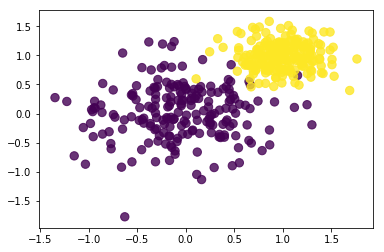

In [8]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [9]:
!wget -O ./residuals_261.npy https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2025-01-19 10:13:33--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt [segue]
--2025-01-19 10:13:34--  https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc006d63dc3eed28a0d318391491.dl.dropboxusercontent.com/cd/0/inline/CidY-FsNJqCS4u4wtUgHpj-jcO_ilIBvY9Bc_tg9wOHLJPtKfMmCNCG4AXgycVZGPK5F5vKQNeJrlTptD0BKtWFMnRlBb37mxGgGGZu_MWAHBLE3Vlw8_jsjaX9wok8iwIo/file# [segue]
--2025-01-19 10:13:35--  https://uc006d63dc3eed28a0d318391491.dl.dropboxusercontent.com/cd/0/inline/CidY-Fs

In [10]:
df1=pd.DataFrame(np.load("residuals_261.npy",allow_pickle=True).item()) #Extract dataframe from file

* Inspect the dataset, you'll find two variables (features)

In [11]:
print("Features of the dataset: \n",df1.describe())

Features of the dataset: 
           residuals     distances
count  11131.000000  11131.000000
mean      -0.616477      9.771465
std        4.163705      5.877819
min     -160.850000      0.000000
25%       -0.330000      4.400000
50%       -0.110000      9.700000
75%        0.060000     14.900000
max       11.320000     24.900000


* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

In [12]:
df1=df1[np.abs(df1["residuals"])<2] #Filtering
df1.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()`

In [19]:
result = scipy.stats.linregress(df1.iloc[:,1], df1.iloc[:,0]) #Linear fit
print("Results of the fit: \n")
print("Intercept: ",f"{result.intercept:.3f}", "with std dev: " ,f"{result.intercept_stderr:.3f}")
print("Slope: ",f"{result.slope:.3f}", "with std dev: ", f"{result.stderr:.3f}")

a=result.slope
b=result.intercept

lab = f"Y={a:.3f}X + {b:.3f}" #label for the plot

Results of the fit: 

Intercept:  -0.154 with std dev:  0.008
Slope:  0.003 with std dev:  0.001


* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"



* Plot the profile plot on top of the scatter plot

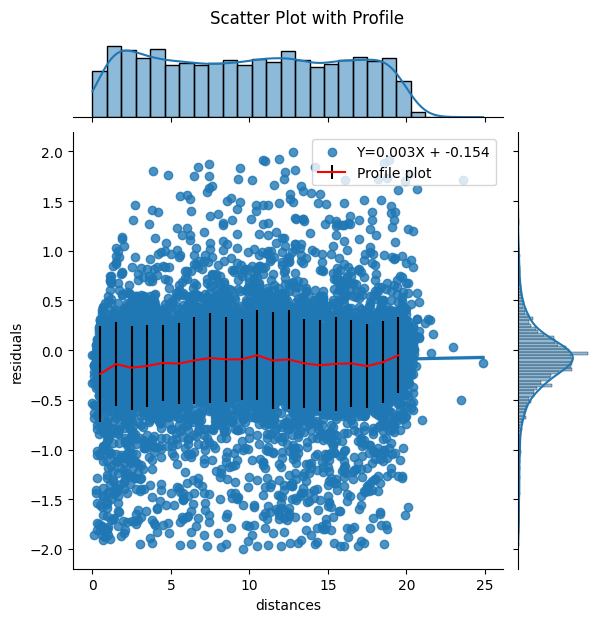

In [20]:
g=sns.jointplot(x="distances", y="residuals", kind="reg", data=df1,label=lab);
plt.legend(loc="best")

#Now we add error bars
N_bins=20
x=np.linspace(0,20,N_bins+1)
y=[np.mean(df1[(df1["distances"]>= x[i]) & (df1["distances"]<= x[i+1])]["residuals"]) for i in np.arange(len(x)-1)] #Mean values of "residuals" in each bin of "distance" 
erry=[np.std(df1[(df1["distances"]>= x[i]) & (df1["distances"]<= x[i+1])]["residuals"]) for i in np.arange(len(x)-1)] #Std dev

bin_centers=(x[1:]+x[:-1])/2

plt.errorbar(bin_centers,y,yerr=erry, color='red',ecolor='black', label = 'Profile plot')
plt.legend()

# Add a title to the jointplot
g.fig.suptitle("Scatter Plot with Profile", y=1.03)
plt.show()